In [5]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def categorize_expenses(expenses):
    categories = {
        'Housing': 0,
        'Food': 0,
        'Transportation': 0,
        'Entertainment': 0,
        'Others': 0
    }
    
    for category, amount in expenses.items():
        if category in categories:
            categories[category] += amount
        else:
            categories['Others'] += amount
    
    return categories

# Placeholder for the calculate_budget function
def calculate_budget(income, expenses, savings_goal):
    total_expenses = sum(expenses.values())
    remaining_income = income - total_expenses - savings_goal
    
    recommendation = ""
    if remaining_income >= 0:
        recommendation = "You're within your budget! Consider increasing your savings."
    else:
        recommendation = "You are exceeding your budget. Try reducing your expenses."

    return expenses, recommendation

def spending_category_suggestions(income, expenses):
    # Financial guidelines: percentages of income spent on categories
    guidelines = {
        'Housing': 0.30,
        'Food': 0.10,
        'Transportation': 0.15,
        'Entertainment': 0.05,
        'Others': 0.10
    }

    suggestions = []
    
    for category, amount in expenses.items():
        if amount / income > guidelines[category]:
            suggestions.append(f"You're spending too much on {category}. Consider cutting back.")

    if not suggestions:
        suggestions.append("You're on track! No changes are needed.")

    return "\n".join(suggestions)

def plot_spending_trends(expenses):
    categories = list(expenses.keys())
    amounts = list(expenses.values())

    plt.figure(figsize=(8, 6))
    plt.bar(categories, amounts, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
    plt.xlabel('Categories')
    plt.ylabel('Amount Spent ($)')
    plt.title('Monthly Spending Breakdown')
    plt.show()

def financial_tips(income, expenses):
    tips = []
    
    if expenses['Entertainment'] / income > 0.05:
        tips.append("Tip: Reduce entertainment costs by exploring free or low-cost activities.")
    
    if expenses['Food'] / income > 0.10:
        tips.append("Tip: Try cooking at home to reduce food expenses.")
    
    if expenses['Transportation'] / income > 0.15:
        tips.append("Tip: Carpooling or using public transportation can save money on transport.")
    
    if not tips:
        tips.append("You're managing your budget well! Keep it up.")
    
    return "\n".join(tips)



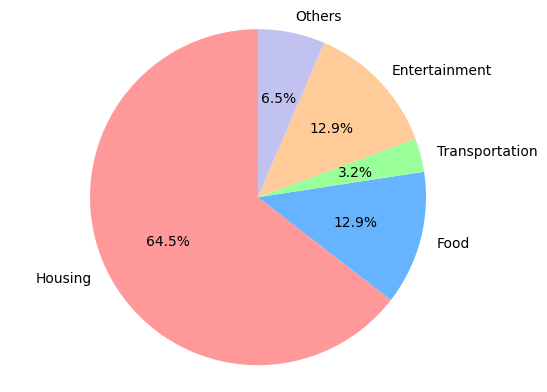

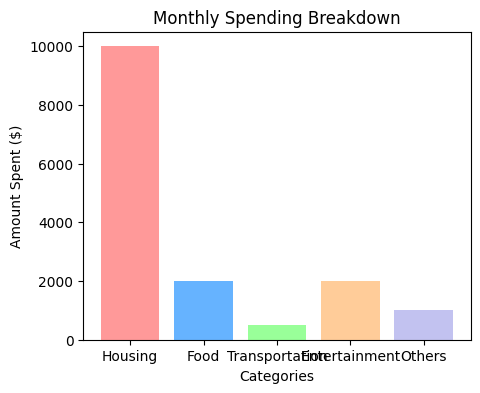

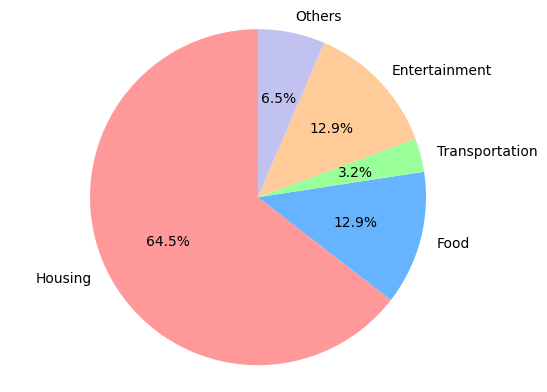

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def categorize_expenses(expenses):
    categories = {
        'Housing': 0,
        'Food': 0,
        'Transportation': 0,
        'Entertainment': 0,
        'Others': 0
    }
    
    for category, amount in expenses.items():
        if category in categories:
            categories[category] += amount
        else:
            categories['Others'] += amount
    
    return categories

def calculate_budget(income, expenses, savings_goal):
    total_expenses = sum(expenses.values())
    remaining_income = income - total_expenses - savings_goal
    
    recommendation = ""
    if remaining_income >= 0:
        recommendation = "You're within your budget! Consider increasing your savings."
    else:
        recommendation = "You are exceeding your budget. Try reducing your expenses."

    return expenses, recommendation

def spending_category_suggestions(income, expenses):
    guidelines = {
        'Housing': 0.30,
        'Food': 0.10,
        'Transportation': 0.15,
        'Entertainment': 0.05,
        'Others': 0.10
    }

    suggestions = []
    
    for category, amount in expenses.items():
        if amount / income > guidelines[category]:
            suggestions.append(f"You're spending too much on {category}. Consider cutting back.")

    if not suggestions:
        suggestions.append("You're on track! No changes are needed.")

    return "\n".join(suggestions)

def plot_pie_chart(expenses):
    categories = list(expenses.keys())
    amounts = list(expenses.values())
    
    fig, ax = plt.subplots()
    ax.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    return fig

def plot_spending_trends(expenses):
    categories = list(expenses.keys())
    amounts = list(expenses.values())

    fig, ax = plt.subplots(figsize=(5, 4))
    ax.bar(categories, amounts, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
    ax.set_xlabel('Categories')
    ax.set_ylabel('Amount Spent ($)')
    ax.set_title('Monthly Spending Breakdown')
    
    return fig

def financial_tips(income, expenses):
    tips = []
    
    if expenses['Entertainment'] / income > 0.05:
        tips.append("Tip: Reduce entertainment costs by exploring free or low-cost activities.")
    
    if expenses['Food'] / income > 0.10:
        tips.append("Tip: Try cooking at home to reduce food expenses.")
    
    if expenses['Transportation'] / income > 0.15:
        tips.append("Tip: Carpooling or using public transportation can save money on transport.")
    
    if not tips:
        tips.append("You're managing your budget well! Keep it up.")
    
    return "\n".join(tips)

def calculate_budget_gui():
    try:
        income = float(income_entry.get())
        housing = float(housing_entry.get())
        food = float(food_entry.get())
        transportation = float(transportation_entry.get())
        entertainment = float(entertainment_entry.get())
        others = float(others_entry.get())
        
        suggested_savings = suggest_savings_goal(income)
        
        if not savings_entry.get():
            savings_goal = suggested_savings
            savings_entry.insert(0, f"{suggested_savings:.2f}")
        else:
            savings_goal = float(savings_entry.get())
        
        expenses = {
            'Housing': housing,
            'Food': food,
            'Transportation': transportation,
            'Entertainment': entertainment,
            'Others': others
        }
        
        categorized_expenses, recommendation = calculate_budget(income, expenses, savings_goal)
        
        result_textbox.delete(1.0, tk.END)
        result_textbox.insert(tk.END, f"Total Monthly Income: ${income:.2f}\n")
        result_textbox.insert(tk.END, f"Savings Goal: ${savings_goal:.2f} (Suggested: ${suggested_savings:.2f})\n\n")
        
        result_textbox.insert(tk.END, "Expenses Breakdown:\n")
        for category, amount in categorized_expenses.items():
            result_textbox.insert(tk.END, f"{category}: ${amount:.2f}\n")
        
        result_textbox.insert(tk.END, f"\nRecommendation: {recommendation}\n")
        
        # Plot pie chart for expense breakdown
        pie_chart_fig = plot_pie_chart(categorized_expenses)
        display_chart(pie_chart_fig)

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

def display_chart(fig):
    for widget in graph_frame.winfo_children():
        widget.destroy()
        
    canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

def display_suggestions_gui(income, expenses):
    suggestions = spending_category_suggestions(income, expenses)
    messagebox.showinfo("Spending Suggestions", suggestions)

def suggest_savings_goal(income):
    return income * 0.2

def display_spending_trends_gui():
    expenses = {
        'Housing': float(housing_entry.get()),
        'Food': float(food_entry.get()),
        'Transportation': float(transportation_entry.get()),
        'Entertainment': float(entertainment_entry.get()),
        'Others': float(others_entry.get())
    }
    bar_chart_fig = plot_spending_trends(expenses)
    display_chart(bar_chart_fig)

def display_financial_tips_gui():
    income = float(income_entry.get())
    expenses = {
        'Housing': float(housing_entry.get()),
        'Food': float(food_entry.get()),
        'Transportation': float(transportation_entry.get()),
        'Entertainment': float(entertainment_entry.get()),
        'Others': float(others_entry.get())
    }
    tips = financial_tips(income, expenses)
    messagebox.showinfo("Financial Tips", tips)

# Function to add scrolling ability
def add_scrollbar_to_window(window):
    canvas = tk.Canvas(window)
    scroll_y = tk.Scrollbar(window, orient="vertical", command=canvas.yview)
    
    scroll_frame = tk.Frame(canvas)
    scroll_frame.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

    canvas.create_window((0, 0), window=scroll_frame, anchor="nw")
    canvas.configure(yscrollcommand=scroll_y.set)
    
    return canvas, scroll_y, scroll_frame

# Create the main Tkinter window
window = tk.Tk()
window.title("Personalized Budgeting Assistant")
window.geometry("800x600")  # Adjusted size for better visibility
window.configure(bg="#f0f8ff")

# Create a scrollable frame
canvas, scroll_y, scroll_frame = add_scrollbar_to_window(window)

# Apply a consistent padding style
padx = 10
pady = 5

# Title Label
title_label = tk.Label(scroll_frame, text="Budgeting Assistant", font=("Arial", 20, "bold"), fg="#333333", bg="#f0f8ff")
title_label.grid(row=0, column=0, columnspan=2, pady=20)

# Create input fields and labels
tk.Label(scroll_frame, text="Monthly Income ($):", font=("Arial", 12), bg="#f0f8ff").grid(row=1, column=0, padx=padx, pady=pady, sticky='w')
income_entry = tk.Entry(scroll_frame, font=("Arial", 11), bg="#e0f7fa")
income_entry.grid(row=1, column=1, padx=padx, pady=pady)

tk.Label(scroll_frame, text="Housing ($):", font=("Arial", 12), bg="#f0f8ff").grid(row=2, column=0, padx=padx, pady=pady, sticky='w')
housing_entry = tk.Entry(scroll_frame, font=("Arial", 11), bg="#e0f7fa")
housing_entry.grid(row=2, column=1, padx=padx, pady=pady)

tk.Label(scroll_frame, text="Food ($):", font=("Arial", 12), bg="#f0f8ff").grid(row=3, column=0, padx=padx, pady=pady, sticky='w')
food_entry = tk.Entry(scroll_frame, font=("Arial", 11), bg="#e0f7fa")
food_entry.grid(row=3, column=1, padx=padx, pady=pady)

tk.Label(scroll_frame, text="Transportation ($):", font=("Arial", 12), bg="#f0f8ff").grid(row=4, column=0, padx=padx, pady=pady, sticky='w')
transportation_entry = tk.Entry(scroll_frame, font=("Arial", 11), bg="#e0f7fa")
transportation_entry.grid(row=4, column=1, padx=padx, pady=pady)

tk.Label(scroll_frame, text="Entertainment ($):", font=("Arial", 12), bg="#f0f8ff").grid(row=5, column=0, padx=padx, pady=pady, sticky='w')
entertainment_entry = tk.Entry(scroll_frame, font=("Arial", 11), bg="#e0f7fa")
entertainment_entry.grid(row=5, column=1, padx=padx, pady=pady)

tk.Label(scroll_frame, text="Others ($):", font=("Arial", 12), bg="#f0f8ff").grid(row=6, column=0, padx=padx, pady=pady, sticky='w')
others_entry = tk.Entry(scroll_frame, font=("Arial", 11), bg="#e0f7fa")
others_entry.grid(row=6, column=1, padx=padx, pady=pady)

tk.Label(scroll_frame, text="Savings Goal ($):", font=("Arial", 12), bg="#f0f8ff").grid(row=7, column=0, padx=padx, pady=pady, sticky='w')
savings_entry = tk.Entry(scroll_frame, font=("Arial", 11), bg="#e0f7fa")
savings_entry.grid(row=7, column=1, padx=padx, pady=pady)

# Buttons
calculate_button = tk.Button(scroll_frame, text="Calculate Budget", command=calculate_budget_gui, font=("Arial", 12), bg="#4caf50", fg="white")
calculate_button.grid(row=8, column=0, columnspan=2, pady=10)

suggestions_button = tk.Button(scroll_frame, text="Show Spending Suggestions", command=lambda: display_suggestions_gui(float(income_entry.get()), {
    'Housing': float(housing_entry.get()),
    'Food': float(food_entry.get()),
    'Transportation': float(transportation_entry.get()),
    'Entertainment': float(entertainment_entry.get()),
    'Others': float(others_entry.get())
}), font=("Arial", 12), bg="#2196f3", fg="white")
suggestions_button.grid(row=9, column=0, columnspan=2, pady=5)

trends_button = tk.Button(scroll_frame, text="Show Spending Trends", command=display_spending_trends_gui, font=("Arial", 12), bg="#ff9800", fg="white")
trends_button.grid(row=10, column=0, columnspan=2, pady=5)

tips_button = tk.Button(scroll_frame, text="Show Financial Tips", command=display_financial_tips_gui, font=("Arial", 12), bg="#9c27b0", fg="white")
tips_button.grid(row=11, column=0, columnspan=2, pady=5)

# Result Text Box
result_textbox = tk.Text(scroll_frame, height=15, width=50, font=("Arial", 11), bg="#f0f8ff")
result_textbox.grid(row=12, column=0, columnspan=2, pady=20)

# Graph Frame
graph_frame = tk.Frame(window, bg="#f0f8ff", width=400)
graph_frame.pack(side=tk.RIGHT, fill=tk.Y)

# Final adjustments
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
scroll_y.pack(side=tk.RIGHT, fill=tk.Y)

# Start the Tkinter main loop
window.mainloop()
